In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
X = dataset.iloc[:, 3:5].values


In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.5, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)   # parameters
y_dbscan = dbscan.fit_predict(X)  

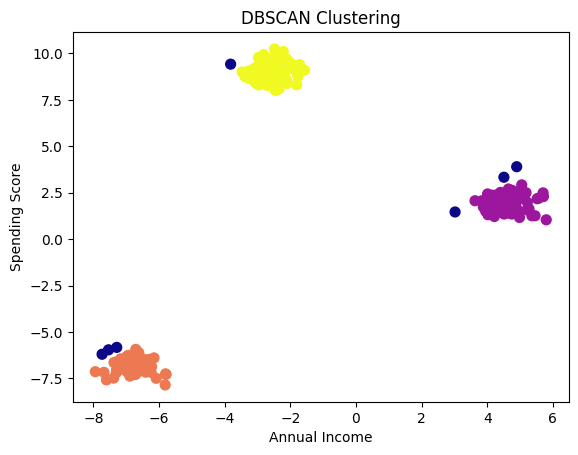

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [23]:
# Print number of clusters and noise points
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 3
Number of noise points: 7


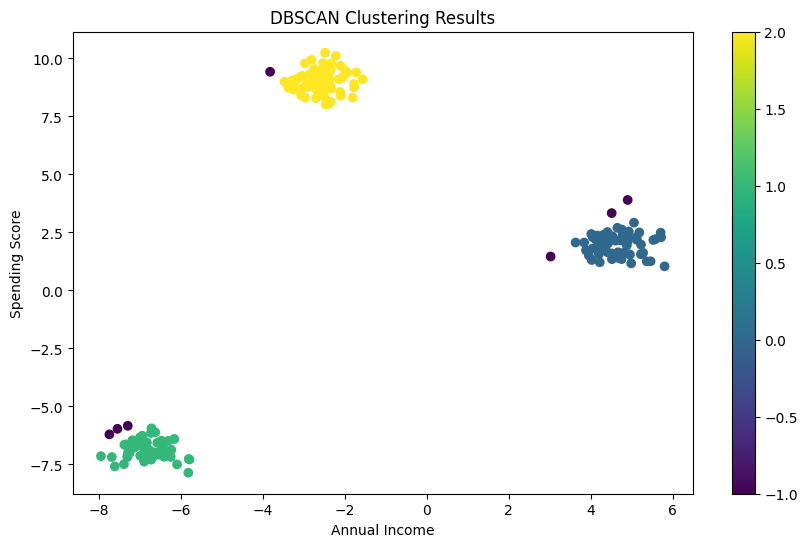

In [24]:
# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c = y_dbscan, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

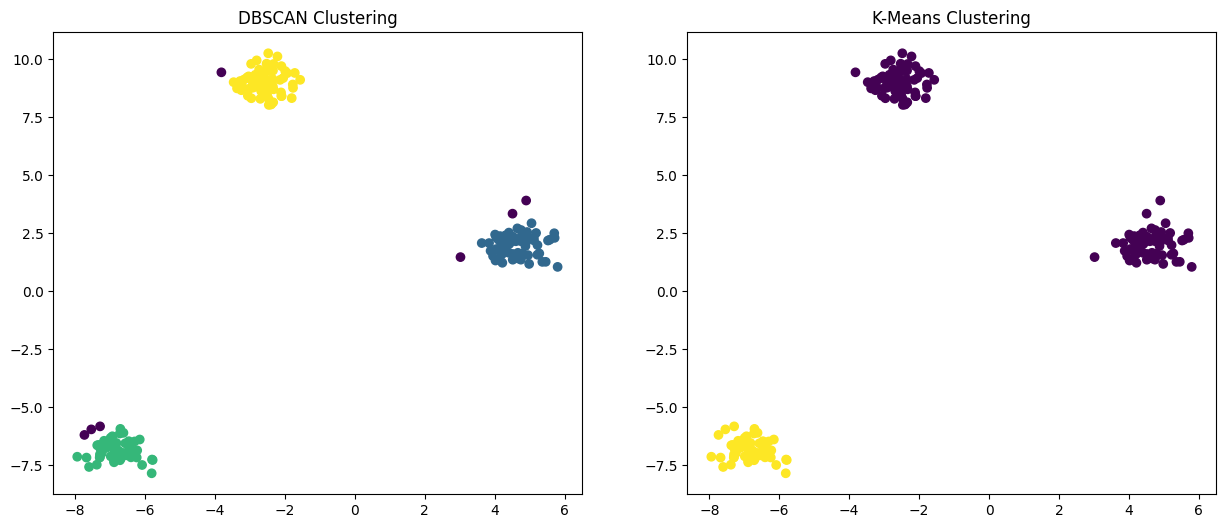

In [25]:
from sklearn.cluster import KMeans

# DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
ax1.set_title('DBSCAN Clustering')

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('K-Means Clustering')

plt.show()

In [26]:
print("X shape:", X.shape)
print("Labels shape:", y_dbscan.shape)

X shape: (200, 2)
Labels shape: (200,)
